In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

In [27]:
def distance(a,b):                                                                        #calculate the distance between two points
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

def create(L):                                                                            #create a matrix of dimension LxL with all ones
    M = np.ones(shape=(L,L))
    return M

def big_matrix(M):                                                                        #create a big matrix 3Lx3L to take PBC into account
    M1 = np.hstack((M,M,M))
    M2 = np.vstack((M1,M1,M1))
    return M2    
    
def x_0(L):                                                                               #take a random point from the initial matrix
    x = random.uniform(L,2*L)
    y = random.uniform(L,2*L)
    center = [x,y]
    return center

def small_matrix(M,c,r):
    A = M[round(c[0]-r-1):round(c[0]+r+2),round(c[1]-r-1):round(c[1]+r+2)]                #take a small matrix centered in x_0 of "radius" r+1
    return A

def count(small,x,r):                                                                     #count how many points are at a distance <= r from x
    n = 0
    l = len(small)
    c = [round((l+1)/2-1)+(x[0]-round(x[0])),round((l+1)/2-1)+(x[1]-round(x[1]))]
    for i in range(l):
        for j in range(l):
            y = [i,j]
            d = distance(y,c)
            if d <= r :
                n += 1
    return n

def arr_counts(L,n,R,big):                                                                # L size, n number of random points, R radius,
    arr = []                                                                              # big is the big matrix (3*L x 3*L)
    for i in range(n):
        center = x_0(L)
        small = small_matrix(big, center, R)
        arr.append(count(small,center,R))
    return arr

def variance(arr):
    mom = np.power(arr,2)
    return np.average(mom)-np.power(np.average(arr),2)

def create_prova(L):
    A = np.arange(L**2).reshape((L, L))
    return A

def rescaled_variance_size(L):
    A = create(L)
    B = big_matrix(A)
    arr_variance = []
    radius = np.linspace(0.01,L/2,num=200)
    for r in radius:
        arr = arr_counts(L,10000,r,B)
        var = variance(arr)
        arr_variance.append(var/r**2)   
    return arr_variance


In [28]:
#debug
L = 10
A = create(L)
B = big_matrix(A)

In [29]:
c = x_0(L)
r = 1
S = small_matrix(B,c,r)
l = len(S)
print(S)
#print(S[c,c])
#count(S,r)
arr = arr_counts(L,10000,r,B)
print(variance(arr))

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
0.46590399000000104


In [30]:
L = [50,100,200]
for size in L:
    x = []
    x = rescaled_variance_size(size)
    plt.plot(x, label = 'L = $size')
    plt.xscale('log')
    plt.yscale('log')
plt.legend()
plt.show()  

KeyboardInterrupt: 

In [ ]:
arrays_var = {}
arrays_var[0] = []
arrays_var[1] = []
arrays_var[2] = []

radius = {}
radius[0] = []
radius[1] = []
radius[2] = []

L = [50,100,200]

for i in 0:
    
    radius[i] = np.linspace(0.01,L[i]/2,num=200)
    
    arrays_var[i] = rescaled_variance_size(L[i])
    
    plt.plot(radius[i], arrays_var[i], label = 'L =' + str(L[i]))
    plt.xscale('log')
    plt.yscale('log')
plt.legend()
plt.show()  




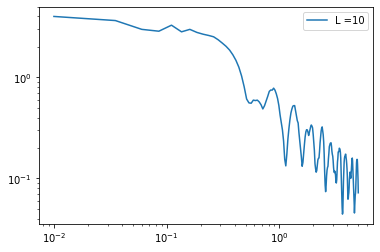

In [56]:
plt.plot(radius[1], arrays_var[1], label = 'L =' + str(L[1]))
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()  
